In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zidanedenino","key":"222a2b487254ca0d0786a3b5e6c79fcb"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
100% 219M/219M [00:11<00:00, 20.7MB/s]
100% 219M/219M [00:11<00:00, 19.9MB/s]


In [13]:
!unzip rice-image-dataset.zip -d ./rice_data

Streaming output truncated to the last 5000 lines.
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: ./rice_data/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: ./rice_data/Ric

In [14]:
!ls ./rice_data

Rice_Image_Dataset


In [15]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten
from keras.layers import MaxPooling2D, BatchNormalization
from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image
import splitfolders

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import pandas as pd
import os
import random

In [4]:
if len(tf.config.list_physical_devices('GPU')) == 0 :
    print('CPU')
else :
    print('GPU')

GPU


In [5]:
print(f'Tensorflow Version : {tf.__version__}')
print(f'Keras Version : {keras.__version__}')

Tensorflow Version : 2.17.1
Keras Version : 3.5.0


In [19]:
data_folder = '/content/rice_data/Rice_Image_Dataset'

In [20]:
images = []
labels = []

for Folder in os.listdir(data_folder):

    Folder_path = os.path.join(data_folder, Folder)
    if not os.path.isdir(Folder_path):
        continue

    for image_filename in os.listdir(Folder_path):
       # Store images in the images list
        image_path = os.path.join(Folder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(Folder)

df = pd.DataFrame({'image': images, 'label': labels})

In [21]:
df.sample(5)

,image,label
4916,/content/rice_data/Rice_Image_Dataset/Basmati/...,Basmati
15035,/content/rice_data/Rice_Image_Dataset/Ipsala/I...,Ipsala
13407,/content/rice_data/Rice_Image_Dataset/Basmati/...,Basmati
73575,/content/rice_data/Rice_Image_Dataset/Arborio/...,Arborio
30349,/content/rice_data/Rice_Image_Dataset/Karacada...,Karacadag


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   75000 non-null  object
 1   label   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [23]:
class_name = os.listdir(data_folder)
class_name

['Basmati',
 'Ipsala',
 'Karacadag',
 'Jasmine',
 'Arborio',
 'Rice_Citation_Request.txt']

In [24]:
class_name.remove('Rice_Citation_Request.txt')
num_classes = len(class_name) # Get number of classes
print(f'\33[94m There are {num_classes} class: ', class_name)

 There are 5 class:  ['Basmati', 'Ipsala', 'Karacadag', 'Jasmine', 'Arborio']


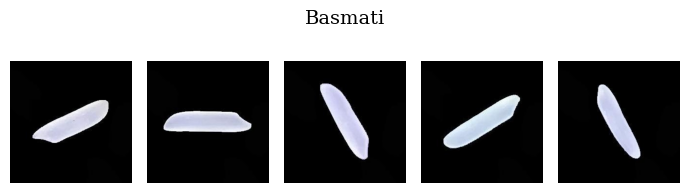

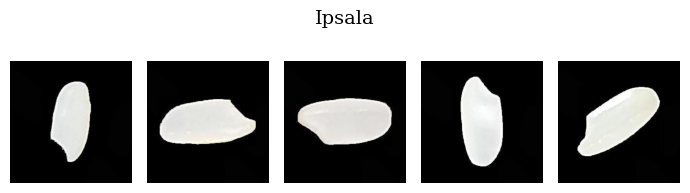

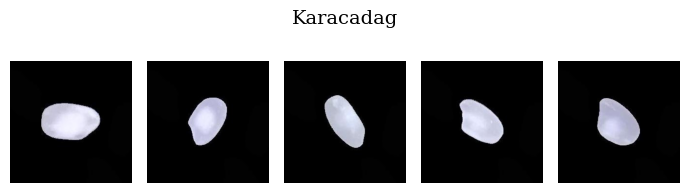

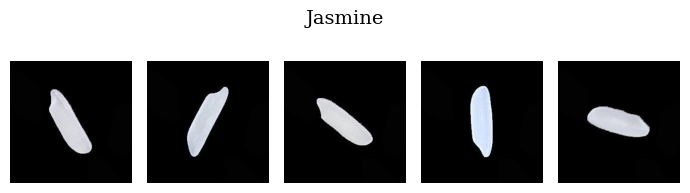

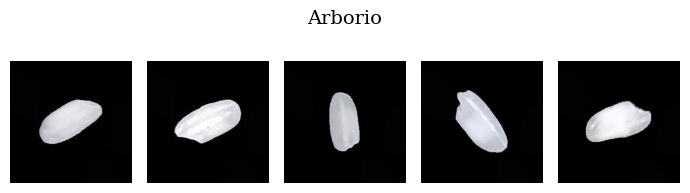

In [26]:
for name in class_name:
    class_path = os.path.join(data_folder, name)
    random_images = random.sample(os.listdir(class_path), 5)

    fig, ax = plt.subplots(1, 5, figsize=(7, 2))
    plt.suptitle(name, fontsize=14, fontname="serif")

    for i, img_name in enumerate(random_images):
        img = keras.utils.load_img(os.path.join(class_path, img_name))
        ax[i].imshow(img)
        ax[i].axis('off')

    plt.tight_layout()

In [27]:
classes_counts= {rice: len(os.listdir(os.path.join(data_folder, rice))) for rice in class_name}
classes_counts

{'Basmati': 15000,
 'Ipsala': 15000,
 'Karacadag': 15000,
 'Jasmine': 15000,
 'Arborio': 15000}

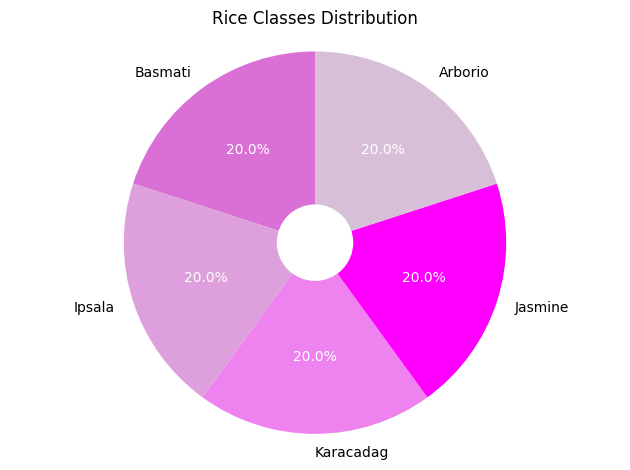

In [28]:
Size = list(classes_counts.values())
Label = list(classes_counts.keys())

colors = ['orchid', 'plum', 'violet', 'fuchsia' , 'thistle']

# Create a pie chart
fig, ax = plt.subplots()
wedges,texts, autotexts = ax.pie(Size, labels=Label, autopct='%1.1f%%', startangle=90, colors=colors)

# Create a circle at the center of the pie chart to create a hole
centre_circle = plt.Circle((0, 0), 0.2, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie chart is circular
ax.axis('equal')

plt.title('Rice Classes Distribution')

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()


In [29]:
splitfolders.ratio(data_folder, output='data_splitted', seed=42, ratio=(0.75, 0.15, 0.1))

Copying files: 75000 files [00:10, 7146.36 files/s]


In [30]:
Batch = 32
Image_Size = (256 , 256)
Seed = 42
Epoch = 15

In [32]:
Train = keras.utils.image_dataset_from_directory(
    directory='/content/data_splitted/train',
    labels='inferred',
    label_mode='categorical',
    batch_size= Batch,
    image_size= Image_Size,
    seed= Seed)

Found 56250 files belonging to 5 classes.


In [33]:
Validation = keras.utils.image_dataset_from_directory(
    directory= '/content/data_splitted/val',
    labels= 'inferred',
    label_mode= 'categorical',
    batch_size= Batch,
    image_size= Image_Size,
    seed= Seed)

Found 11250 files belonging to 5 classes.


In [34]:
Test = keras.utils.image_dataset_from_directory(
    directory= '/content/data_splitted/test',
    labels= 'inferred',
    label_mode= 'categorical',
    batch_size= Batch,
    image_size= Image_Size,
    seed= Seed)

Found 7500 files belonging to 5 classes.


In [35]:
checking = [Train, Test, Validation]
for i in checking:
    Class_labels = i.class_names
    print(Class_labels)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [36]:
print(f'Train samples: {Train}\n\n, Validation samples: {Validation}\n\n, Test samples: {Test}')

Train samples: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

, Validation samples: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

, Test samples: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


In [37]:
def compile_model(model, learning_rate=0.001, loss='binary_crossentropy', metrics=["accuracy"]):
    model.compile(loss=loss if loss == 'binary_crossentropy' else BinaryCrossentropy(),
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=metrics)
    return model

In [38]:
def model1():
    inp1 = layers.Input((256 , 256 , 3))
   # x1 = layers.Rescaling(1/255)(inp1)
    x1 = layers.Conv2D(filters=32 , kernel_size=3, activation='relu')(inp1)
    x1 = layers.MaxPooling2D(pool_size=2, strides=2)(x1)
    x1 = layers.Flatten()(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Flatten()(x1)
    x1 = layers.Dense(5, activation='softmax')(x1)  # We have 5 class

    first_model = models.Model(inp1 , x1)
    return first_model

test_model1 = model1()
test_model1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 516128)              │       2,064,512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │       2,580,645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,646,053 (17.72 MB)

 Trainable params: 3,613,797 (13.79 MB)

 Non-trainable params: 1,032,256 (3.94 MB)

In [39]:
compiled_model1 = compile_model(test_model1)
model1_fit = compiled_model1.fit(Train , epochs = Epoch ,validation_data = Validation)

Epoch 1/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9435 - loss: 0.5878 - val_accuracy: 0.5927 - val_loss: 5.1205
Epoch 2/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9841 - loss: 0.1255 - val_accuracy: 0.8310 - val_loss: 2.7837
Epoch 3/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9882 - loss: 0.1093 - val_accuracy: 0.8855 - val_loss: 1.7902
Epoch 4/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.9920 - loss: 0.1000 - val_accuracy: 0.7538 - val_loss: 11.8139
Epoch 5/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9922 - loss: 0.1119 - val_accuracy: 0.6124 - val_loss: 14.5806
Epoch 6/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 132s 42ms/step - accuracy: 0.9953 - loss: 0.0808 - val_accuracy: 0.9696 - val_loss: 2.1063
Epoch 7/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9959 - loss: 0.0797 - val_accuracy: 0.9572 - val_loss: 1.7357
Epoch 8/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 132s 42ms/step - accuracy: 0.9

In [41]:
Training_loss1 = model1_fit.history["loss"]
Training_acc1 = model1_fit.history["accuracy"]
Validation_loss1 = model1_fit.history["val_loss"]
Validation_acc1 = model1_fit.history["val_accuracy"]

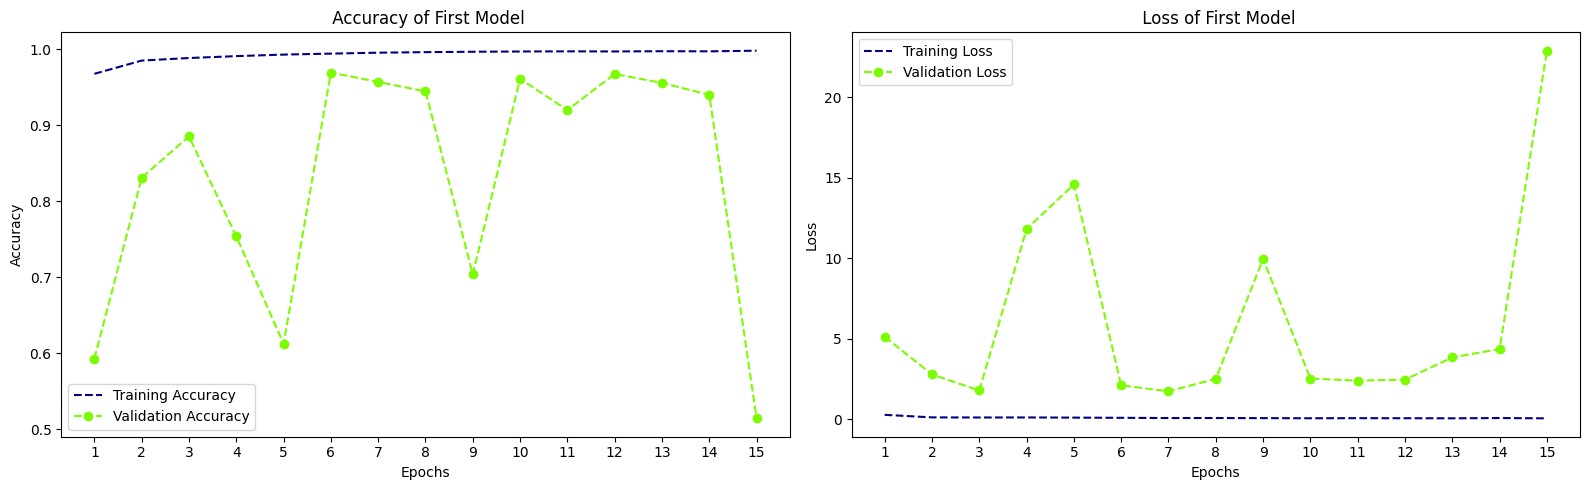

In [42]:
epoch_count = np.arange(1, len(Training_loss1) + 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot Training Accuracy and Validation Accuracy
axs[0].plot(epoch_count, Training_acc1, 'r--', color='navy', label='Training Accuracy')
axs[0].plot(epoch_count, Validation_acc1, '--bo', color='lawngreen', label='Validation Accuracy')

axs[0].legend()
axs[0].set_title(' Accuracy of First Model')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.arange(1, 16))
axs[0].grid(False)

# Plot Training Loss and Validation Loss
axs[1].plot(epoch_count, Training_loss1, 'r--', color='navy', label='Training Loss')
axs[1].plot(epoch_count, Validation_loss1, '--bo', color='lawngreen', label='Validation Loss')

axs[1].legend()
axs[1].set_title(' Loss of First Model')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(np.arange(1, 16))
axs[1].grid(False)

# Show the plots
plt.tight_layout()
plt.show()


In [43]:
def model2():
    inp2 = layers.Input((256 , 256 , 3))
    x2 = layers.Rescaling(1/255)(inp2)
    x2 = layers.Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu')(inp2)
    x2 = layers.MaxPooling2D( 2 , 2)(x2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.MaxPooling2D( 2 , 2)(x2)
    x2 = layers.Flatten()(x2)
    x2 = layers.Dropout(0.5)(x2)
    x2 = layers.Dense(units = 5 , activation = 'softmax')(x2)

    second_model = models.Model(inp2 , x2)

    return second_model

test_model2 = model2()
test_model2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │         635,045 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,069 (2.43 MB)

 Trainable params: 636,005 (2.43 MB)

 Non-trainable params: 64 (256.00 B)

In [44]:
compiled_model2 = compile_model(test_model2)
model2_fit = compiled_model2.fit(Train , epochs = Epoch , validation_data = Validation)


Epoch 1/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 89s 49ms/step - accuracy: 0.9199 - loss: 0.4057 - val_accuracy: 0.9820 - val_loss: 0.0866
Epoch 2/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 128s 42ms/step - accuracy: 0.9793 - loss: 0.0998 - val_accuracy: 0.9848 - val_loss: 0.0530
Epoch 3/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9846 - loss: 0.0536 - val_accuracy: 0.9880 - val_loss: 0.0321
Epoch 4/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 75s 42ms/step - accuracy: 0.9885 - loss: 0.0301 - val_accuracy: 0.9850 - val_loss: 0.0282
Epoch 5/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.9900 - loss: 0.0205 - val_accuracy: 0.9845 - val_loss: 0.0313
Epoch 6/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.9932 - loss: 0.0160 - val_accuracy: 0.9912 - val_loss: 0.0187
Epoch 7/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9935 - loss: 0.0137 - val_accuracy: 0.9895 - val_loss: 0.0230
Epoch 8/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.9942 

In [45]:
Training_loss2 = model2_fit.history["loss"]
Training_acc2 = model2_fit.history["accuracy"]
Validation_loss2 = model2_fit.history["val_loss"]
Validation_acc2 = model2_fit.history["val_accuracy"]

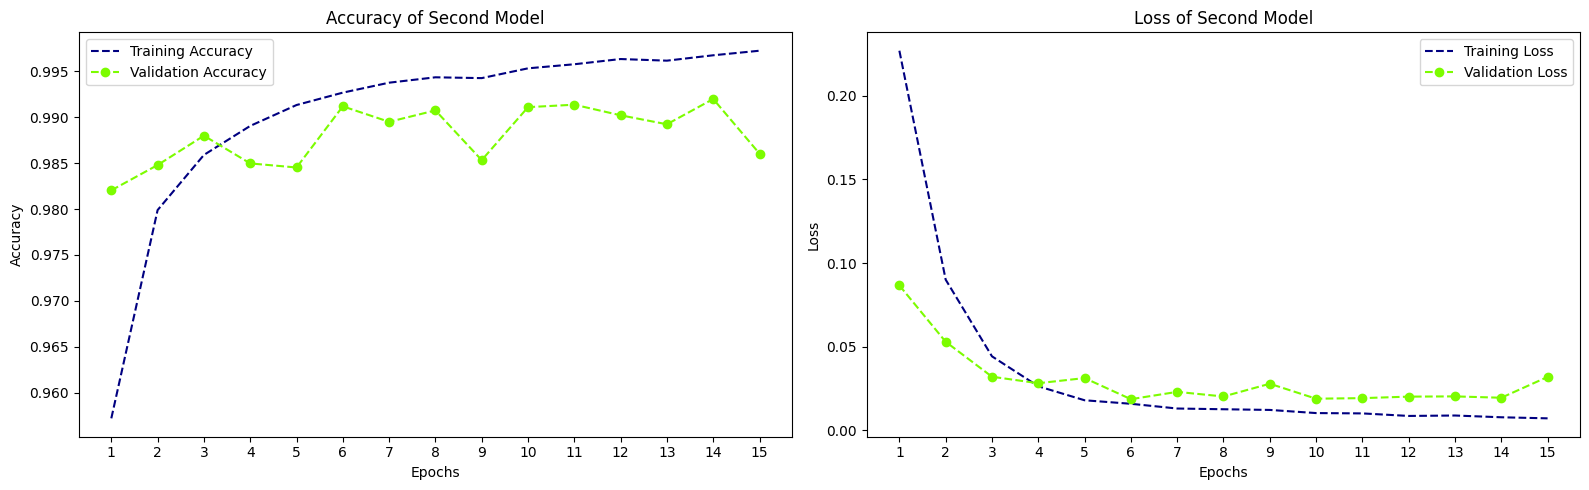

In [46]:
epoch_count = np.arange(1, len(Training_loss2) + 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(epoch_count, Training_acc2, 'r--', color='navy', label='Training Accuracy')
axs[0].plot(epoch_count, Validation_acc2, '--bo', color='lawngreen', label='Validation Accuracy')

axs[0].legend()
axs[0].set_title('Accuracy of Second Model')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.arange(1, 16))
axs[0].grid(False)

axs[1].plot(epoch_count, Training_loss2, 'r--', color='navy', label='Training Loss')
axs[1].plot(epoch_count, Validation_loss2, '--bo', color='lawngreen', label='Validation Loss')

axs[1].legend()
axs[1].set_title('Loss of Second Model')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(np.arange(1, 16))
axs[1].grid(False)

plt.tight_layout()
plt.show()


In [47]:
def model3():
    inp3 = layers.Input((256 , 256 , 3))
    x3 = layers.Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu')(inp3)
    x3 = layers.MaxPooling2D( 2 , 2)(x3)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Flatten()(x3)
    x3 = layers.Dropout(0.5)(x3)
    x3 = layers.Dense(units = 5 , activation = 'softmax')(x3)

    third_model = models.Model(inp3 , x3)

    return third_model

test_model3 = model3()
test_model3.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │       2,580,645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,581,669 (9.85 MB)

 Trainable params: 2,581,605 (9.85 MB)

 Non-trainable params: 64 (256.00 B)

In [48]:
compiled_model3 = compile_model(test_model3)
model3_fit = compiled_model3.fit(Train , epochs = Epoch , validation_data = Validation)


Epoch 1/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.9174 - loss: 0.7691 - val_accuracy: 0.9810 - val_loss: 0.1204
Epoch 2/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - accuracy: 0.9863 - loss: 0.0895 - val_accuracy: 0.9846 - val_loss: 0.0730
Epoch 3/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - accuracy: 0.9915 - loss: 0.0394 - val_accuracy: 0.9838 - val_loss: 0.0616
Epoch 4/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9935 - loss: 0.0252 - val_accuracy: 0.9862 - val_loss: 0.0400
Epoch 5/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.9953 - loss: 0.0175 - val_accuracy: 0.9886 - val_loss: 0.0301
Epoch 6/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9841 - val_loss: 0.0441
Epoch 7/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9971 - loss: 0.0118 - val_accuracy: 0.9898 - val_loss: 0.0267
Epoch 8/15
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.9977 -

In [49]:
Training_loss3 = model3_fit.history["loss"]
Training_acc3 = model3_fit.history["accuracy"]
Validation_loss3 = model3_fit.history["val_loss"]
Validation_acc3 = model3_fit.history["val_accuracy"]


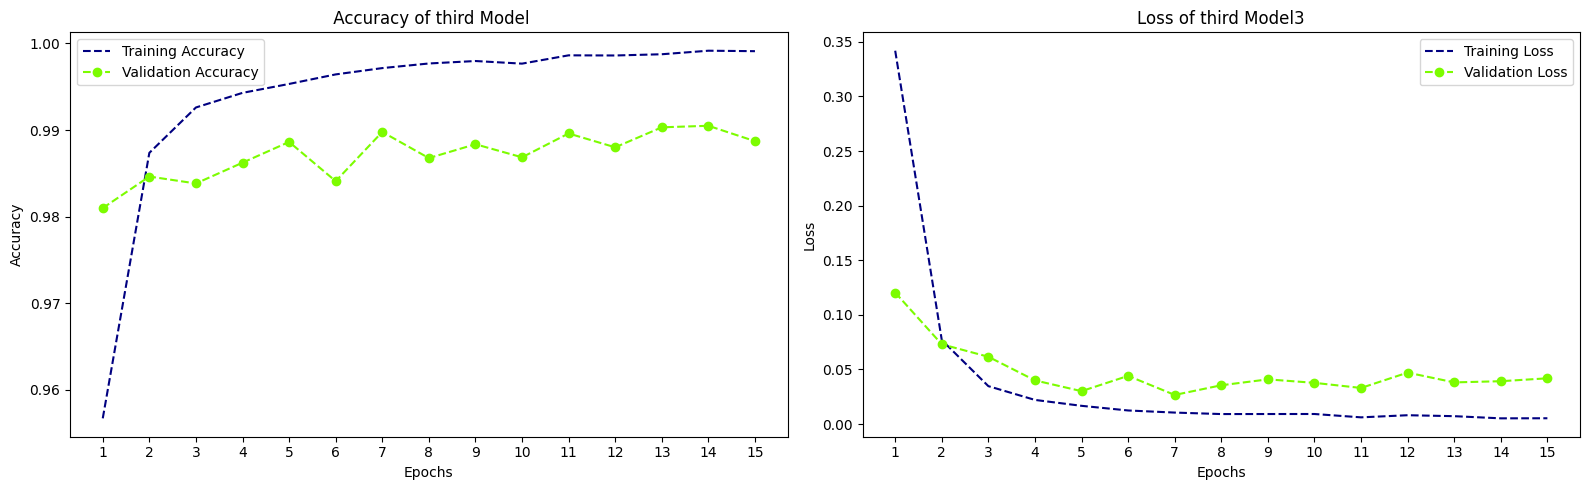

In [50]:
epoch_count = np.arange(1, len(Training_loss3) + 1)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(epoch_count, Training_acc3, 'r--', color='navy', label='Training Accuracy')
axs[0].plot(epoch_count, Validation_acc3, '--bo', color='lawngreen', label='Validation Accuracy')

axs[0].legend()
axs[0].set_title(' Accuracy of third Model')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.arange(1, 16))
axs[0].grid(False)

axs[1].plot(epoch_count, Training_loss3, 'r--', color='navy', label='Training Loss')
axs[1].plot(epoch_count, Validation_loss3, '--bo', color='lawngreen', label='Validation Loss')

axs[1].legend()
axs[1].set_title('Loss of third Model3')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(np.arange(1, 16))
axs[1].grid(False)

plt.tight_layout()
plt.show()


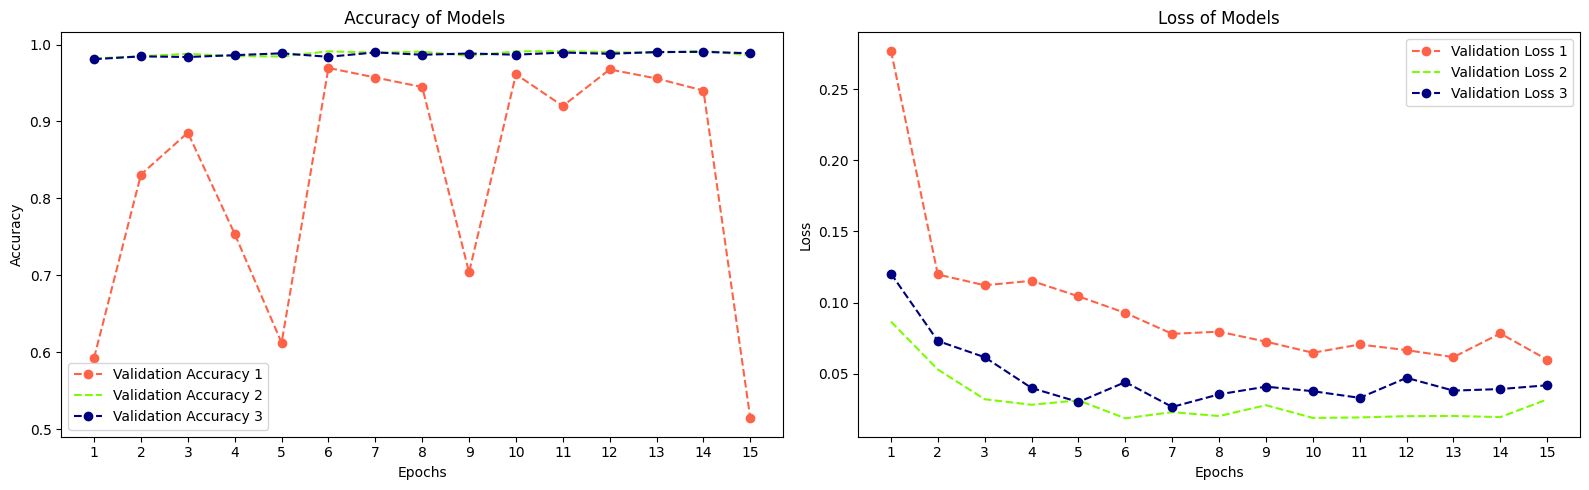

In [51]:
epoch_count = np.arange(1, len(Training_loss3) + 1)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(epoch_count, Validation_acc1, '--bo', color='tomato', label='Validation Accuracy 1')
axs[0].plot(epoch_count, Validation_acc2, 'r--', color='lawngreen', label='Validation Accuracy 2')
axs[0].plot(epoch_count, Validation_acc3, '--bo', color='navy', label='Validation Accuracy 3')

axs[0].legend()
axs[0].set_title(' Accuracy of Models')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(np.arange(1, 16))
axs[0].grid(False)

axs[1].plot(epoch_count, Training_loss1, '--bo', color='tomato', label='Validation Loss 1')
axs[1].plot(epoch_count, Validation_loss2, 'r--', color='lawngreen', label='Validation Loss 2')
axs[1].plot(epoch_count, Validation_loss3, '--bo', color='navy', label='Validation Loss 3')

axs[1].legend()
axs[1].set_title('Loss of Models')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(np.arange(1, 16))
axs[1].grid(False)

plt.tight_layout()
plt.show()
